In [1]:
import numpy as np
from scipy.optimize import minimize


def f(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_prime(a, b, c, d, t):
    return  3*a*(t**2) + 2*b*t + c

def f_double_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


# test for a = 1 , b =1 , c =1 , d=5
# f = t^3 + t^2 + t + 5
# f_prime = 3t^2 + 2t + 1
# f_double_prime = 6t + 2
# DE: f_prime + f_double_prime = 3t^2 +8t+3
f0_real = 0.5
def DE(f_prime,f_double_prime,t):

    return  f_prime + f_double_prime - (3*(t**2)+8*t+3)
    



t_data = np.linspace(0, 1, 50)
target_values = 1 * t_data**3 + 1 * t_data**2 + 1 * t_data + f0_real

def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    a, b, c, d = params
   
    u_prime = f_prime(a, b, c, d,t_data)
    u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i = np.sum((DE(f_prime=u_prime,f_double_prime=u_double_prime,t=t_data))**2)

    eta = 5
    f0_pred = f(a, b, c, d, 0)
    loss_b = eta * (f0_pred - f0_real) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss

initial_params = [10, 20, 8,70]


# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a, b, c,d = result.x


print("Optimized a:", a)
print("Optimized b:", b)
print("Optimized c:", c)
print("Optimized d:", d)

Current loss: 1453144.3052275146
Current loss: 937086.8771072654
Current loss: 904987.561294293
Current loss: 609820.2110326588
Current loss: 159321.70646361614
Current loss: 0.013426984544157394
Current loss: 0.007765546264751692
Current loss: 0.0005399263540107317
Optimized a: 0.9860058900125117
Optimized b: 1.0637209888078842
Optimized c: 0.8648592746535472
Optimized d: 0.5000110118500022


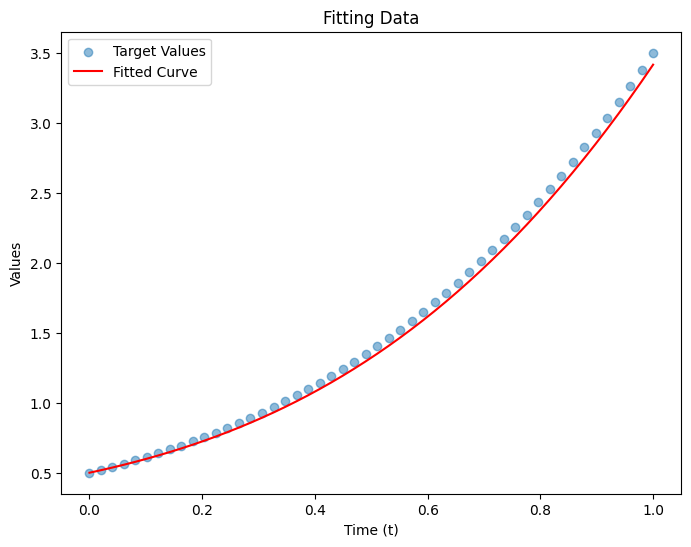

In [2]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, target_values, label='Target Values', alpha=0.5)
fitted_values = f(a, b, c, d,t_data)
plt.plot(t_data, fitted_values, 'r', label='Fitted Curve')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()
